In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv('./scratch/export.csv', encoding='windows-1250', sep=';')

In [4]:
#dropna
data.dropna(how='all', subset=['Lat', 'ObsLat'], inplace=True)
data.dropna(how='all', subset=['TaxonNameCZ'], inplace=True)

In [5]:
#number of observers active weekly
weekly_act = {}
obs_num = len(data.ObserversSurname.unique())
week = 0
for we in data.groupby('Week').ObserversSurname.unique():
    week += 1
    weekly_act[week] = len(we)

#relative to max active in one week
w_max = np.max(list(weekly_act.values()))
for key, value in weekly_act.items():
    weekly_act[key] = value / w_max

In [6]:
#data = data[['Date', 'Year', 'Month', 'TenDays', 'Week', 'TimeStart', 'TimeEnd', 'Lat', 'Lon', 'TaxonNameCZ', 'CountLow', 'CountHigh', 'CountExact']]

In [7]:
#aggregate
series = {}
for row in data.iterrows():
    name = row[1]['TaxonNameCZ']
    week = row[1]['Week']
    
    if name not in series:
        series[name] = dict(zip(np.arange(1, 54), np.zeros(53, dtype=np.int)))
        
    series[name][week] += 1

In [8]:
#sort
sums = {}
for key in series:
    sums[key] = np.sum(list(series[key].values()))

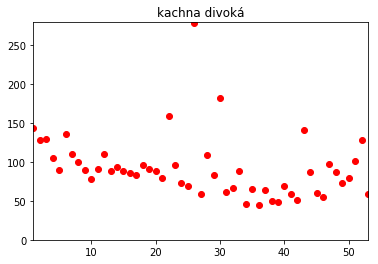

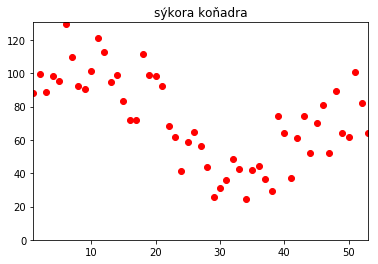

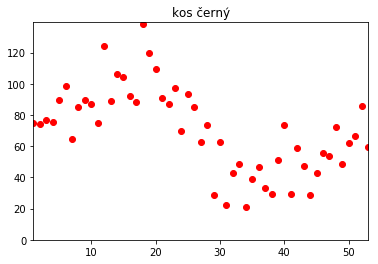

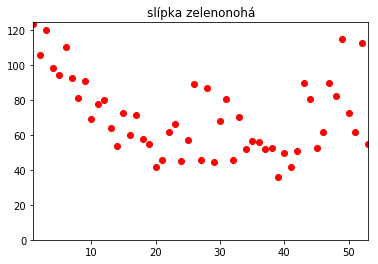

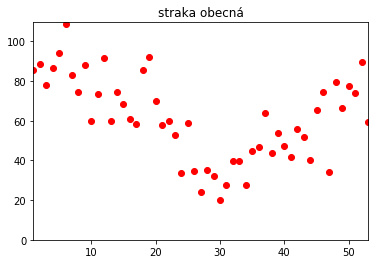

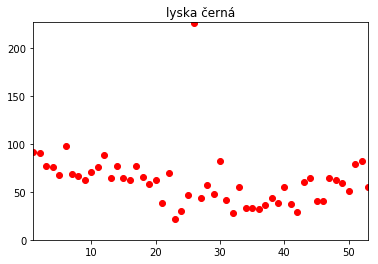

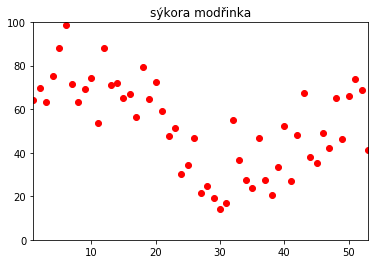

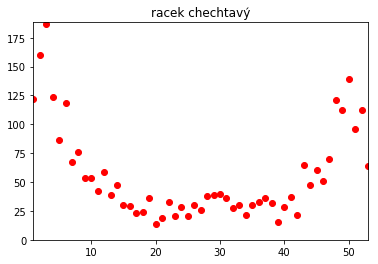

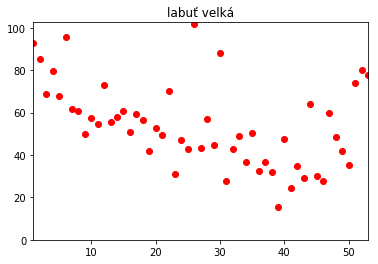

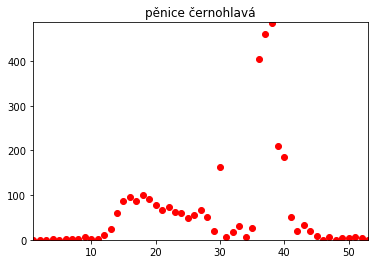

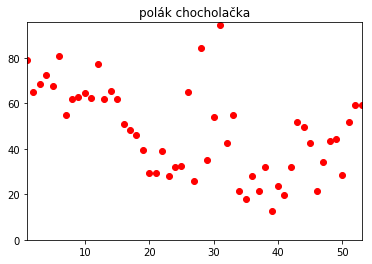

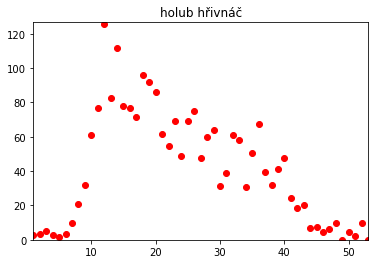

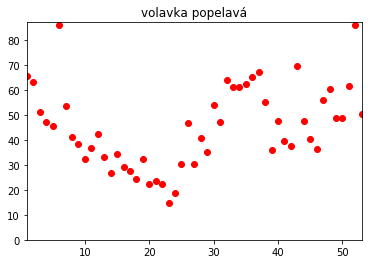

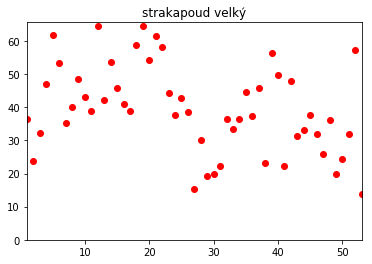

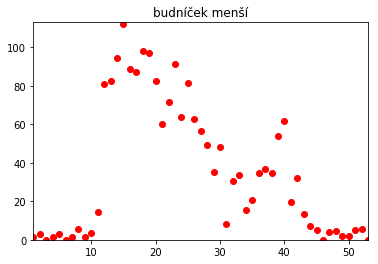

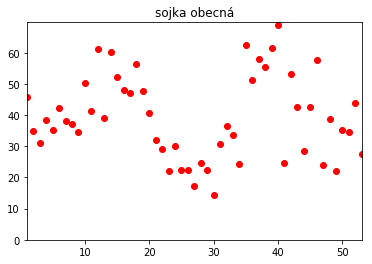

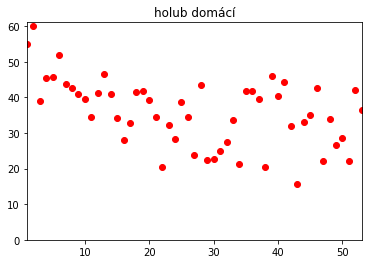

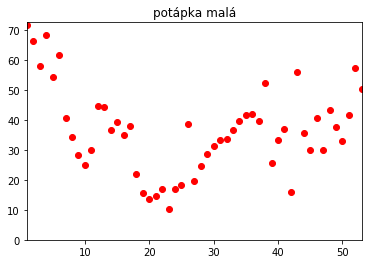

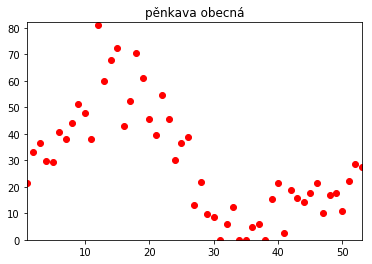

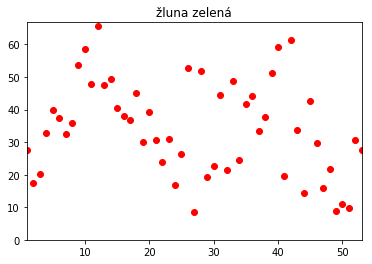

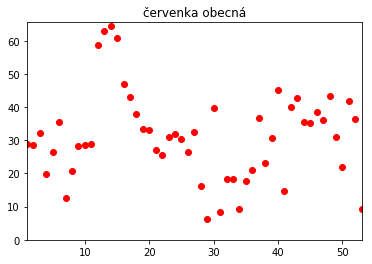

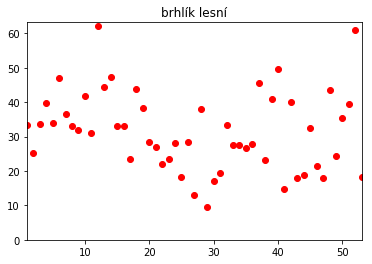

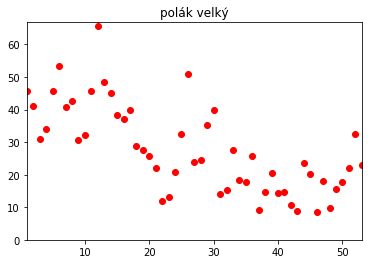

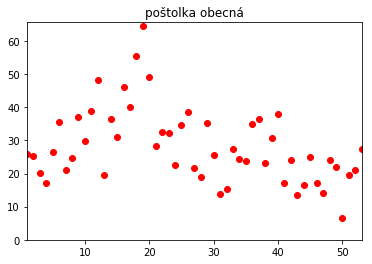

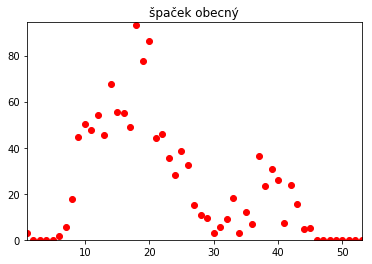

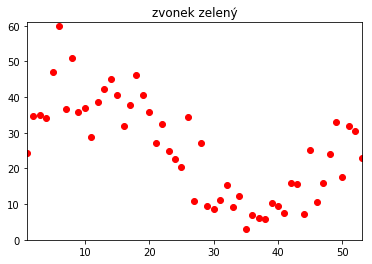

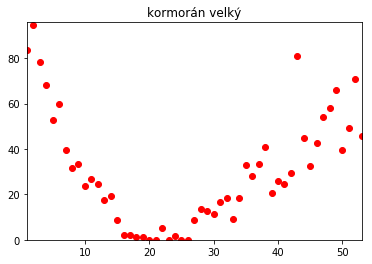

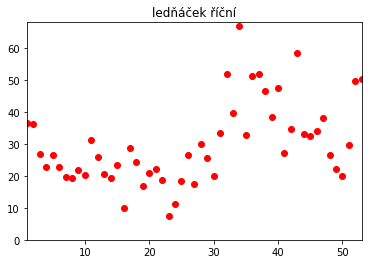

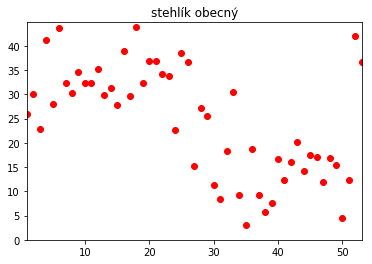

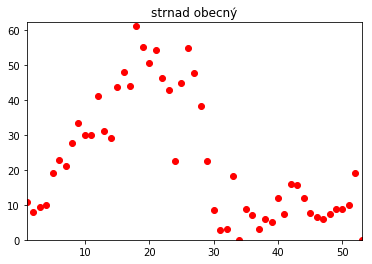

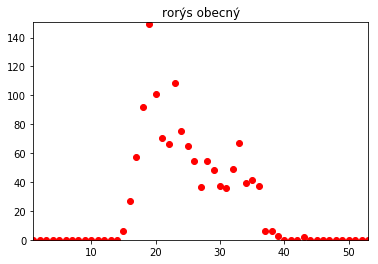

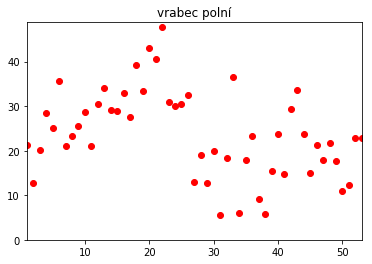

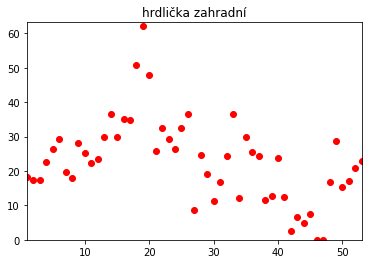

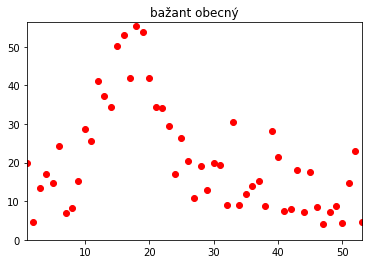

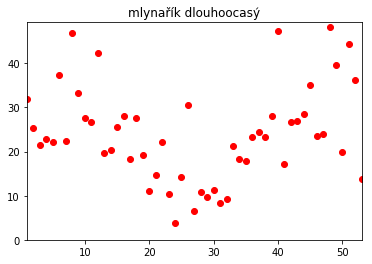

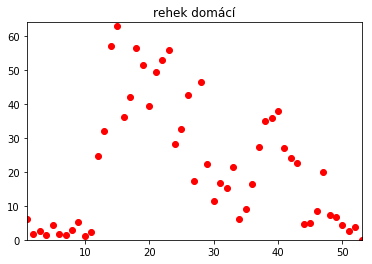

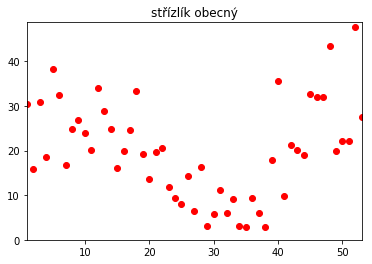

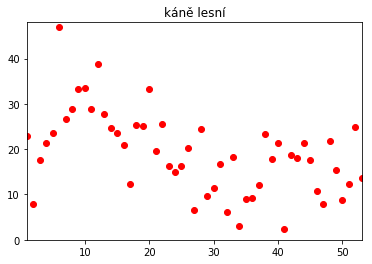

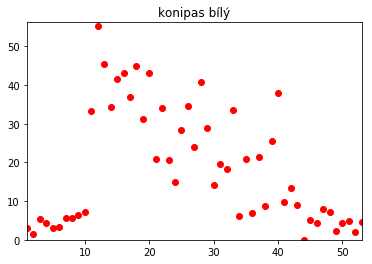

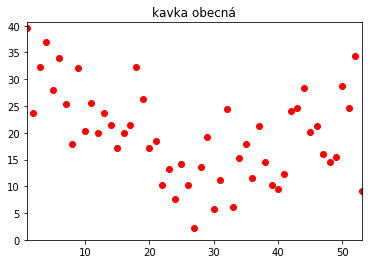

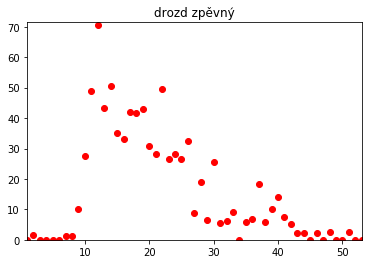

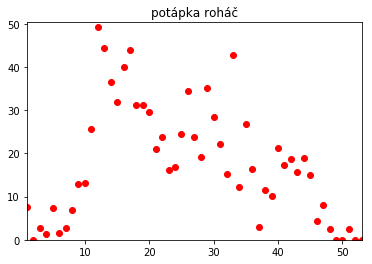

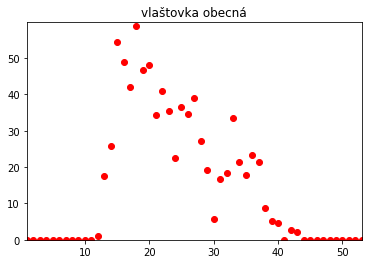

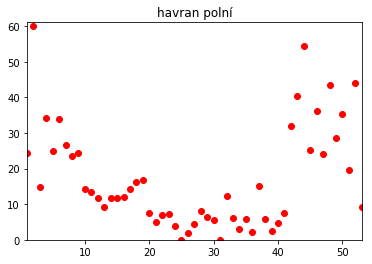

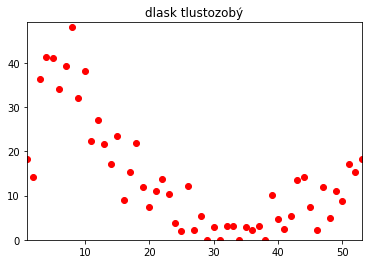

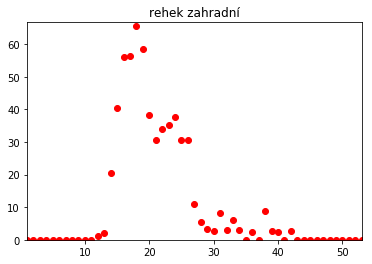

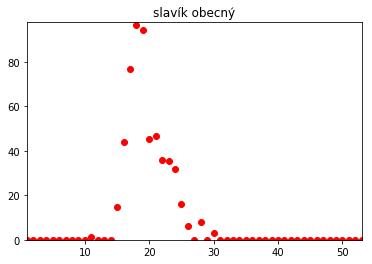

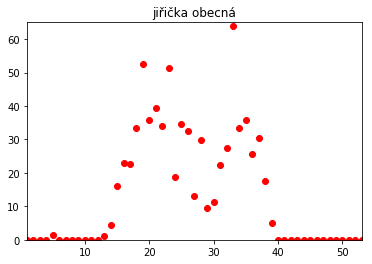

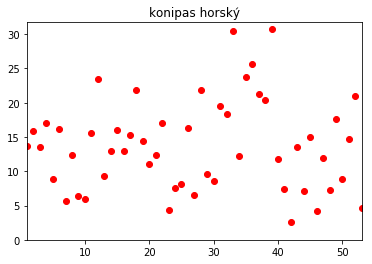

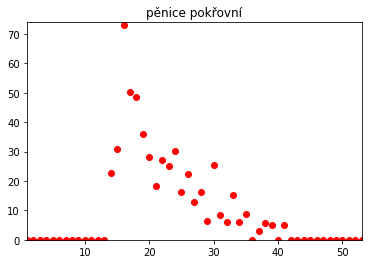

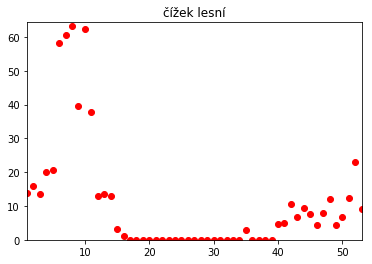

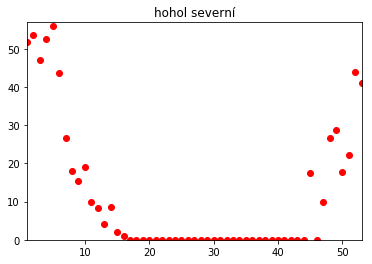

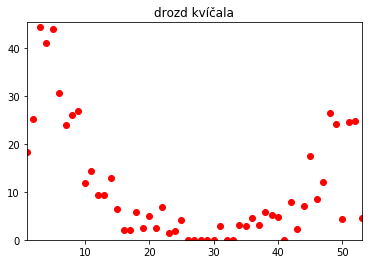

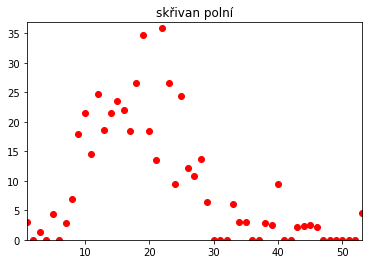

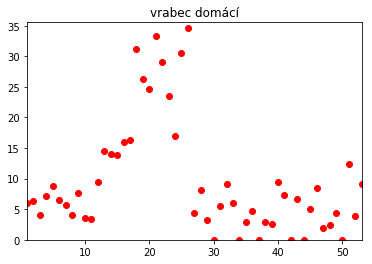

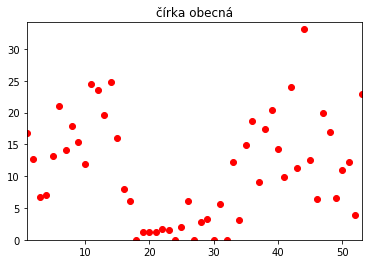

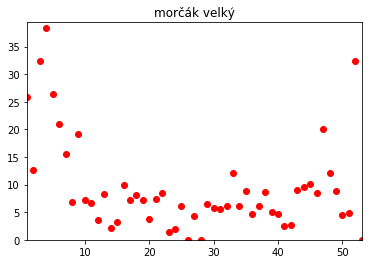

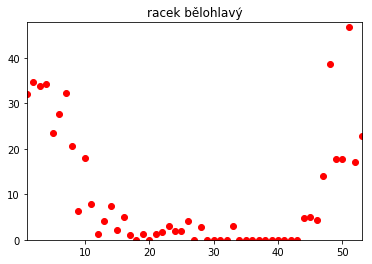

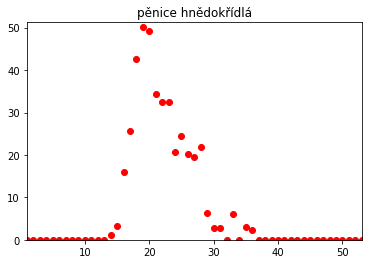

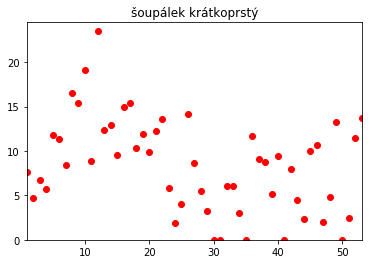

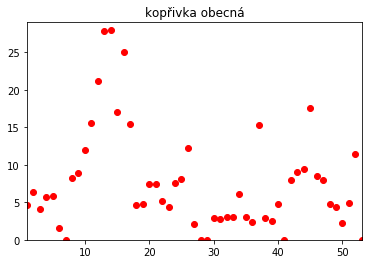

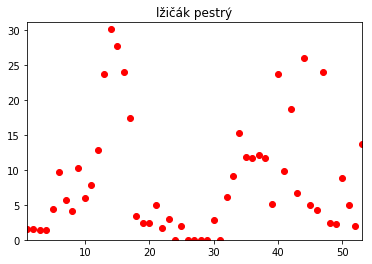

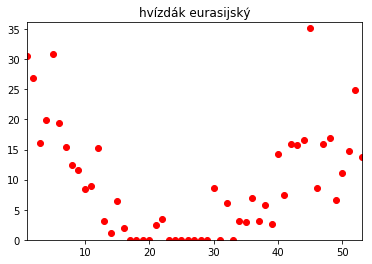

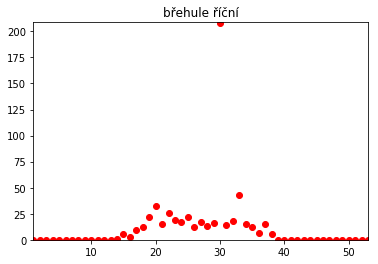

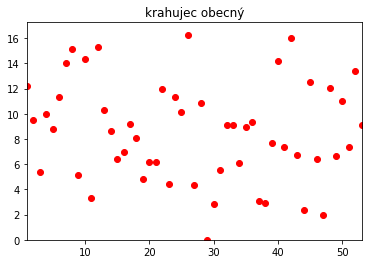

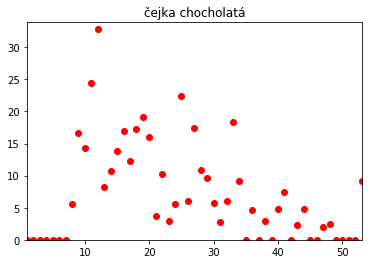

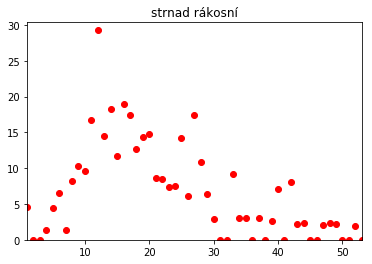

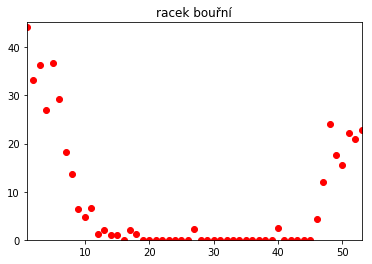

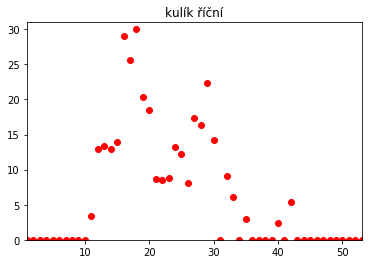

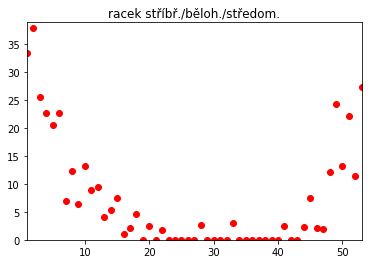

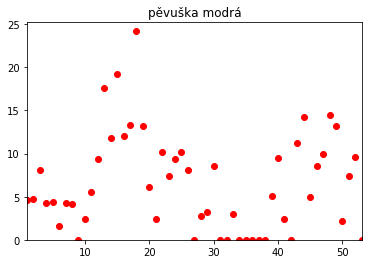

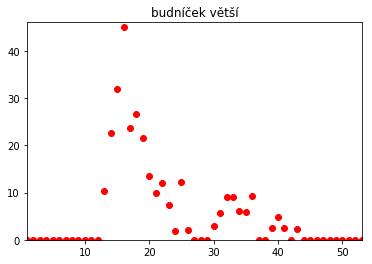

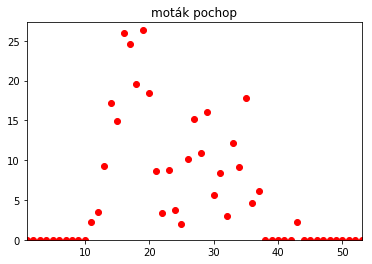

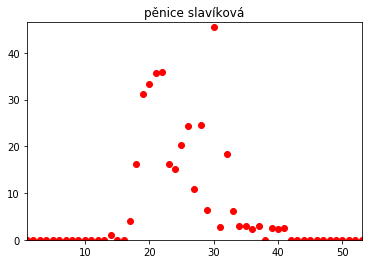

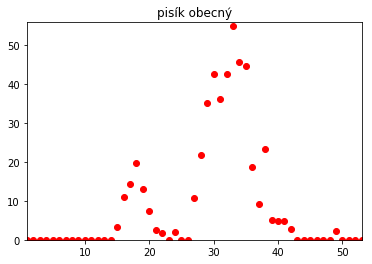

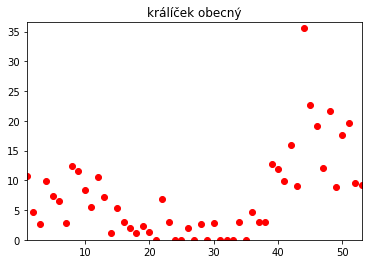

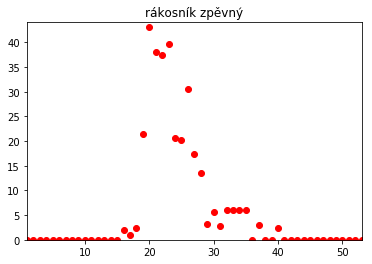

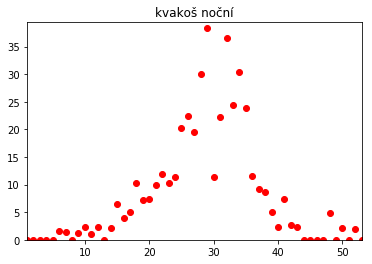

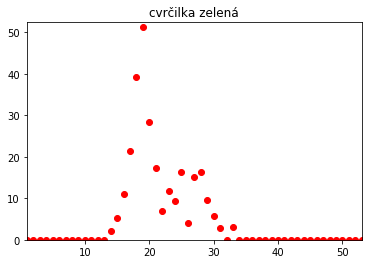

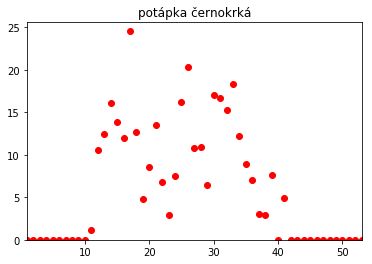

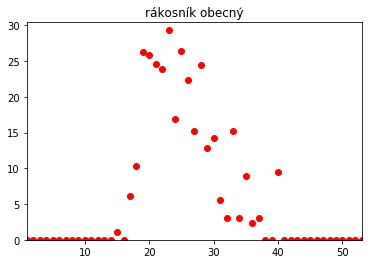

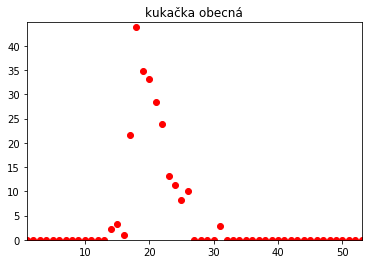

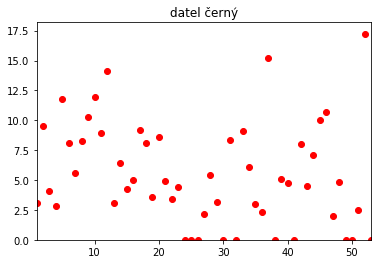

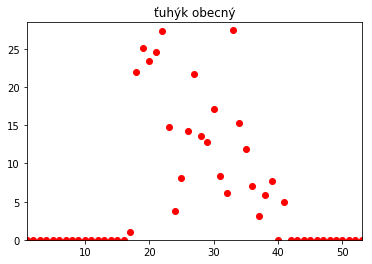

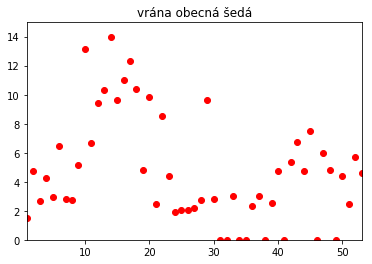

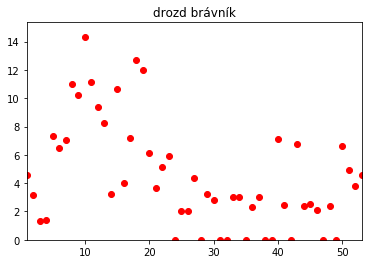

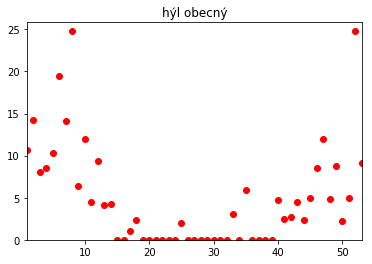

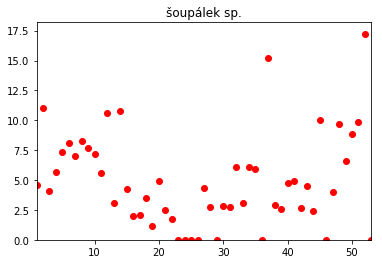

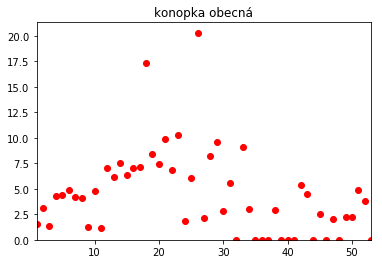

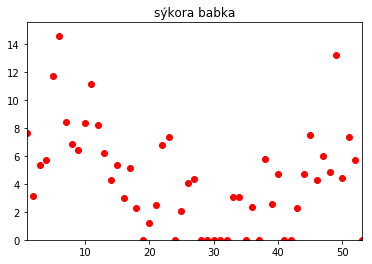

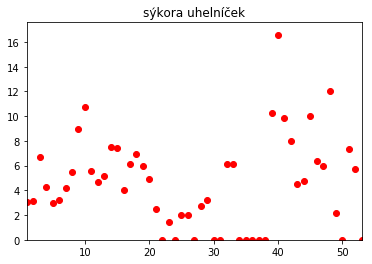

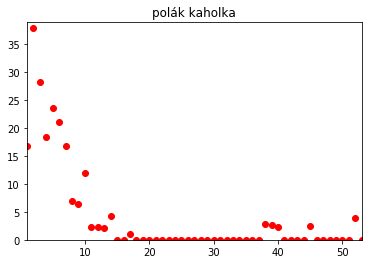

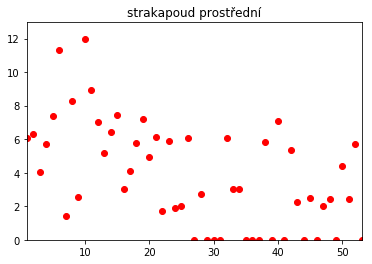

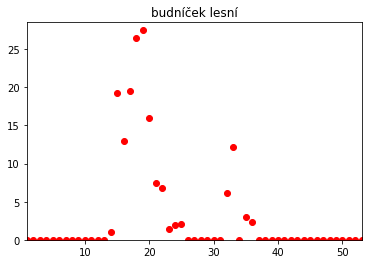

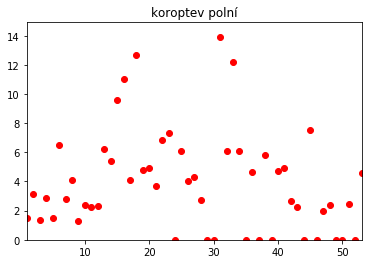

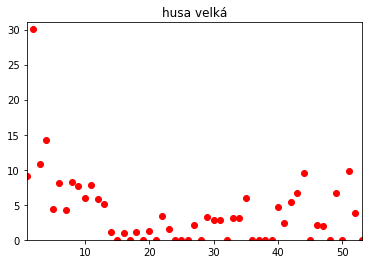

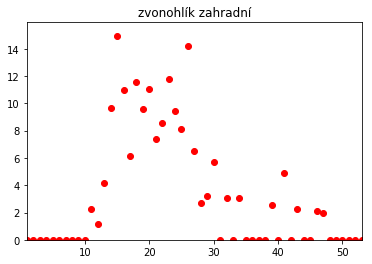

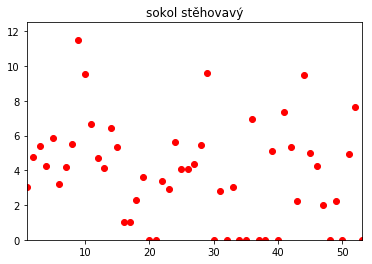

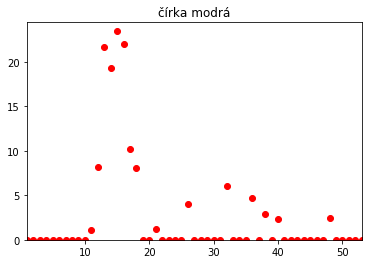

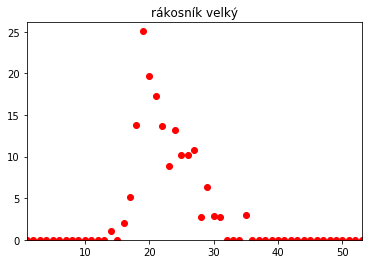

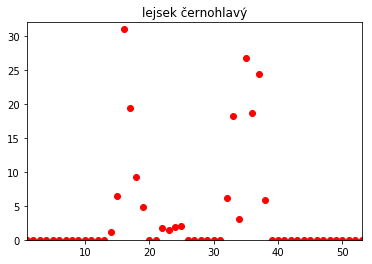

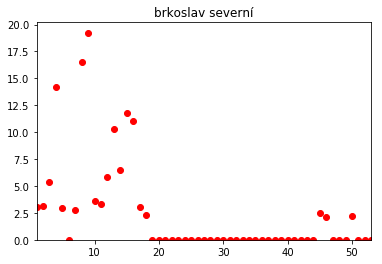

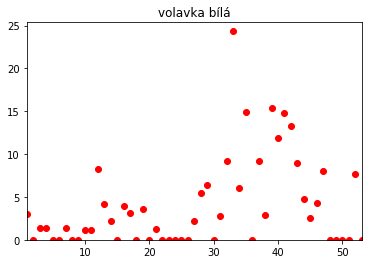

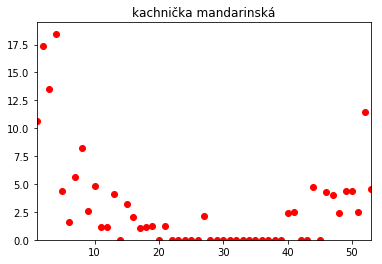

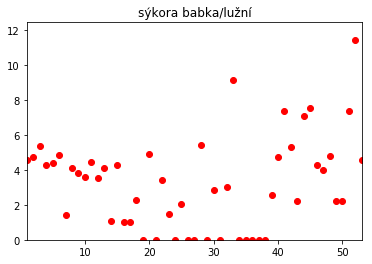

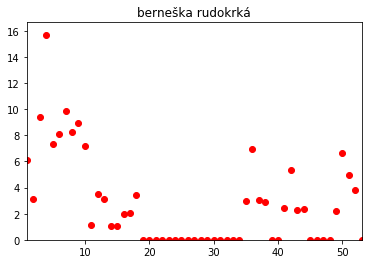

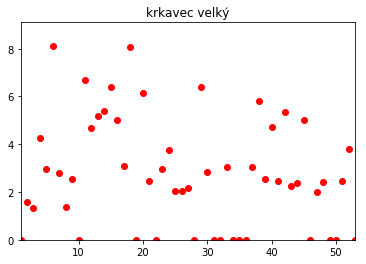

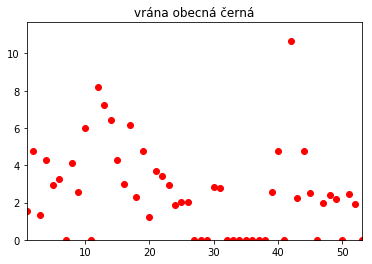

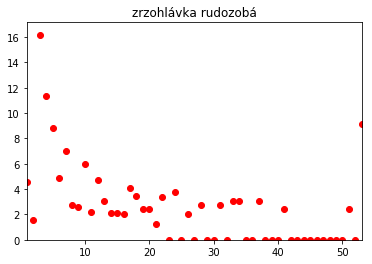

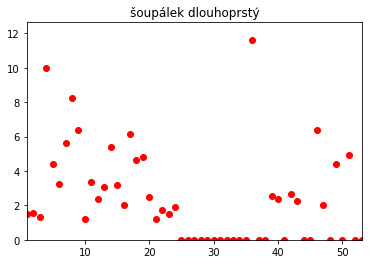

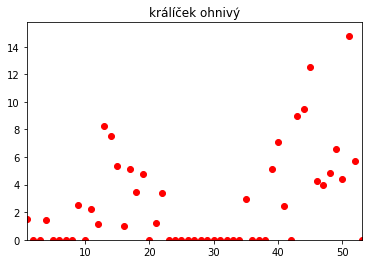

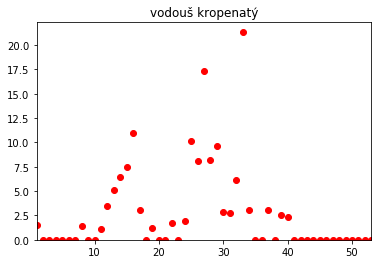

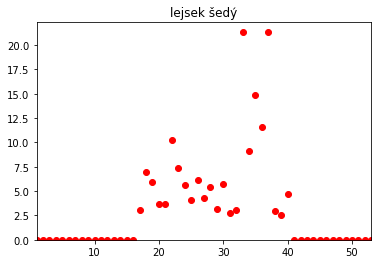

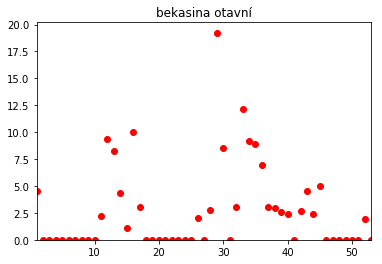

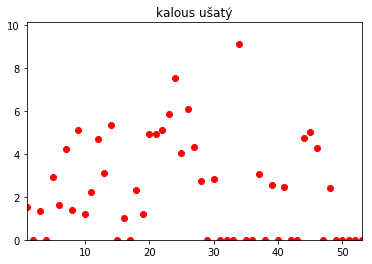

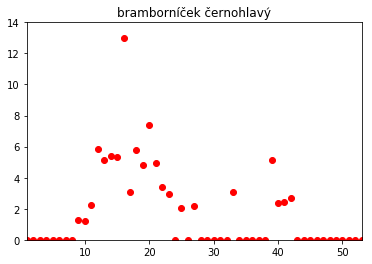

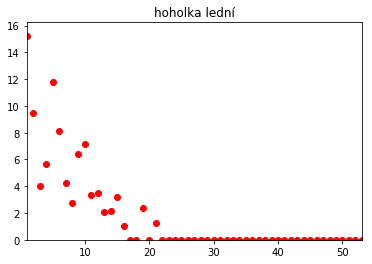

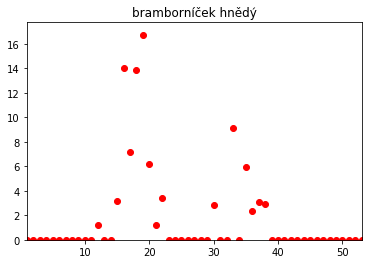

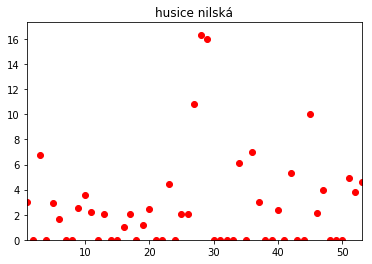

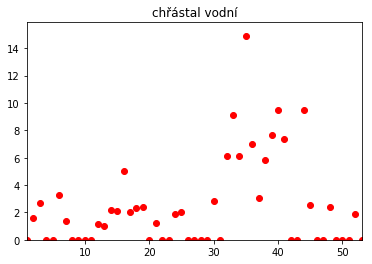

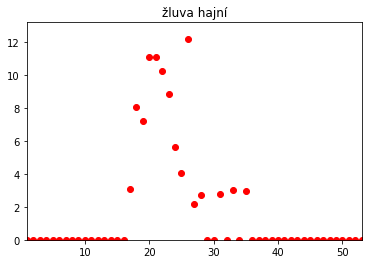

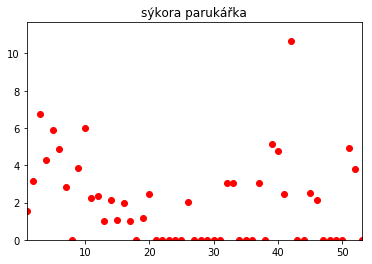

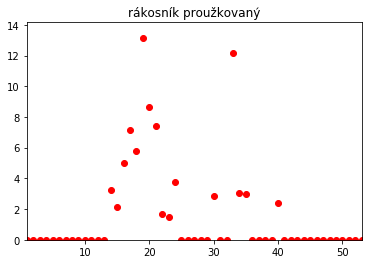

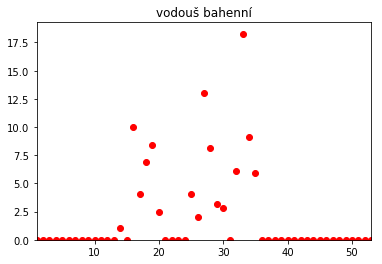

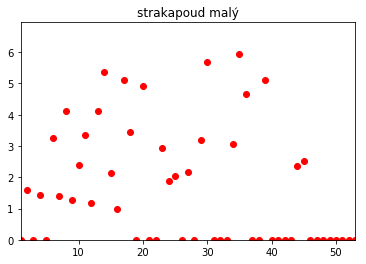

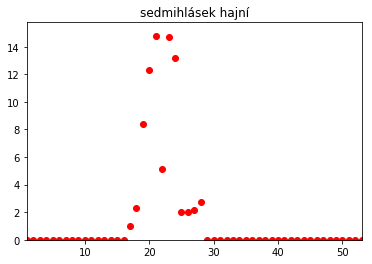

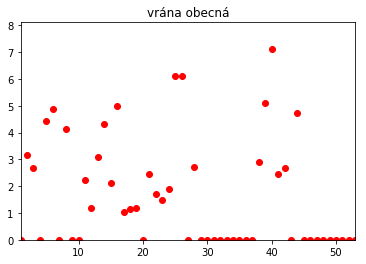

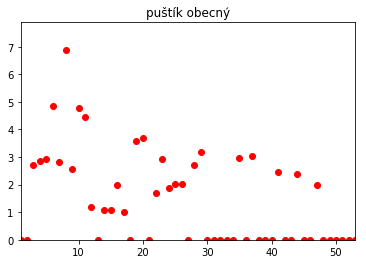

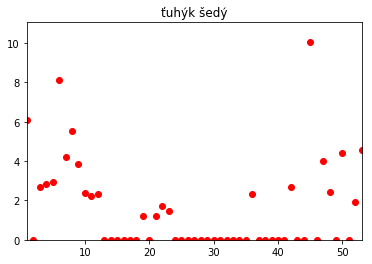

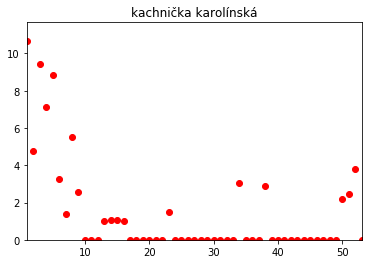

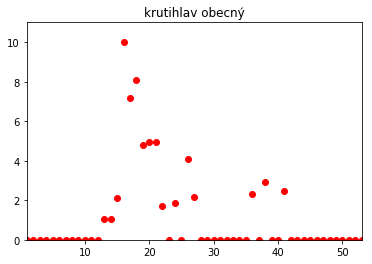

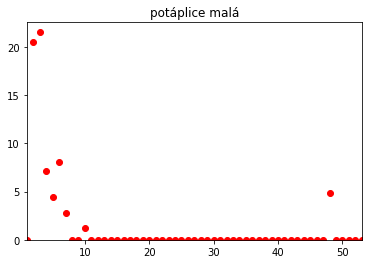

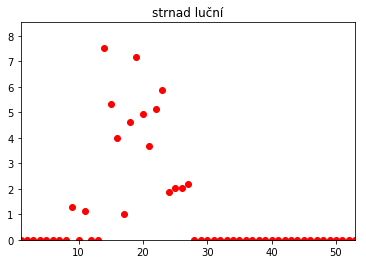

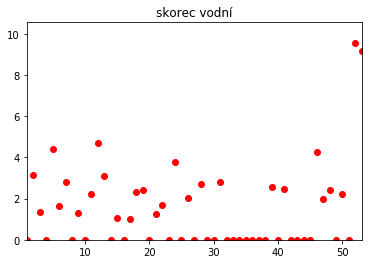

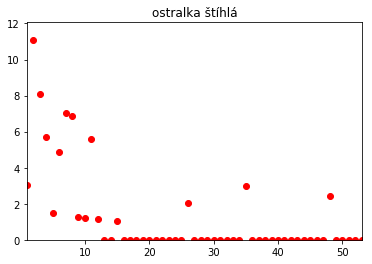

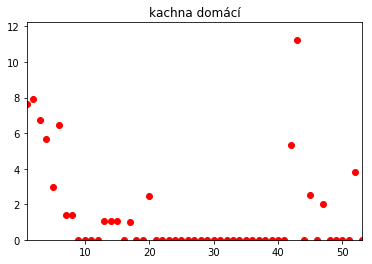

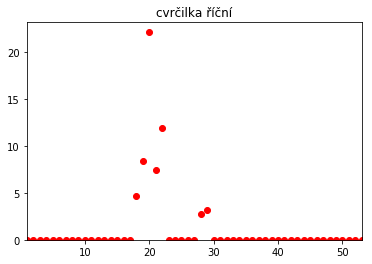

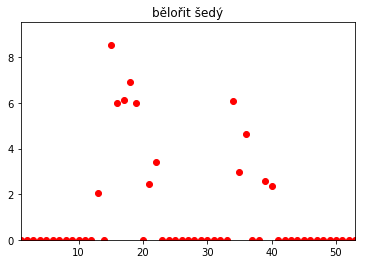

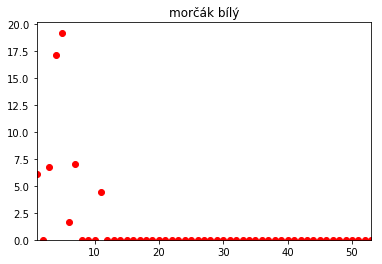

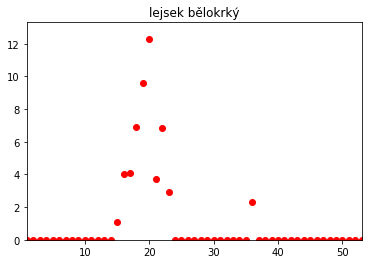

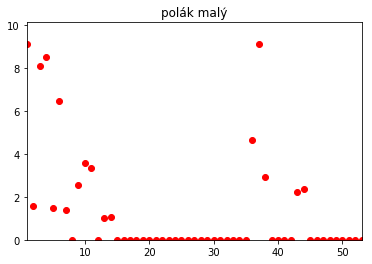

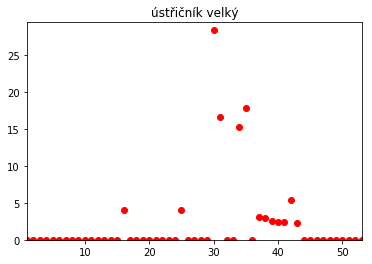

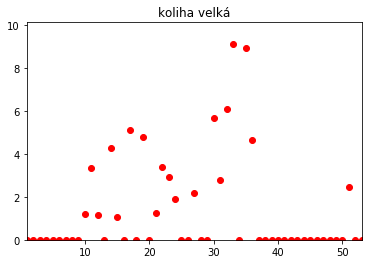

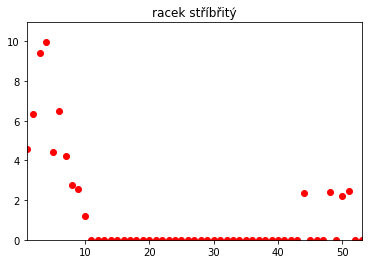

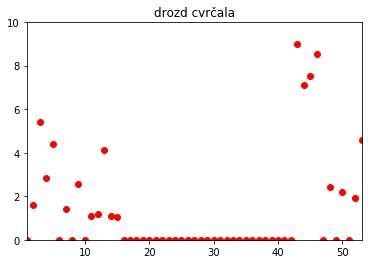

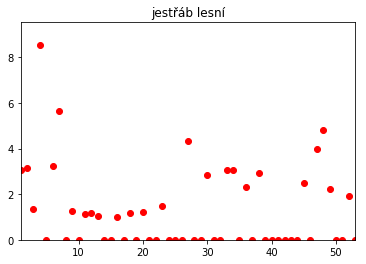

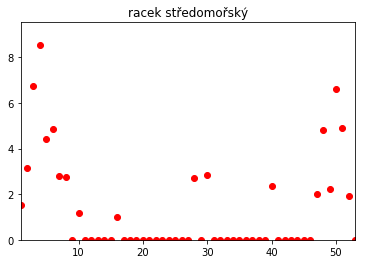

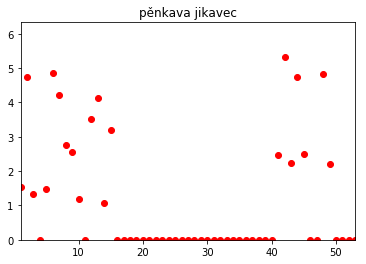

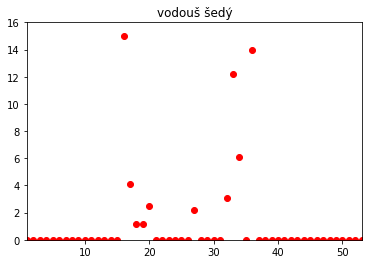

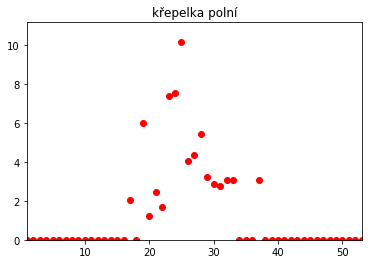

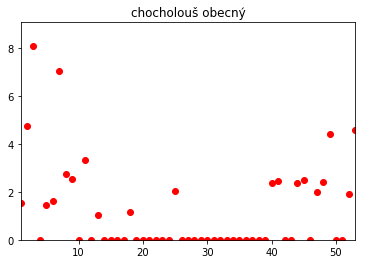

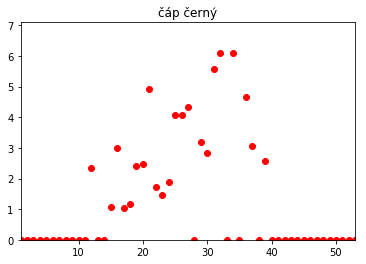

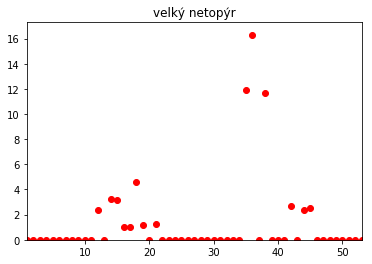

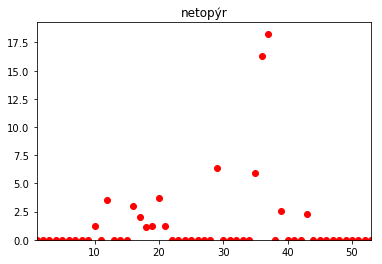

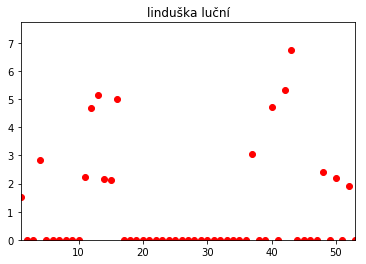

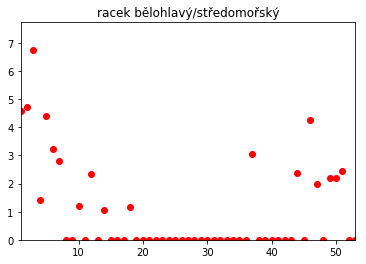

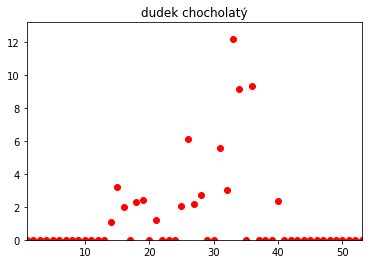

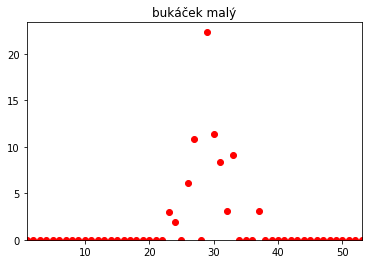

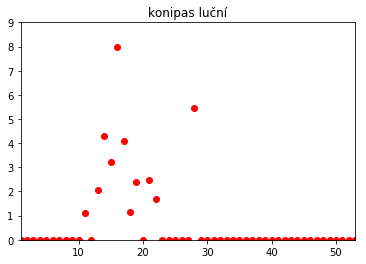

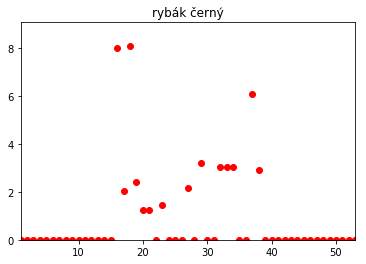

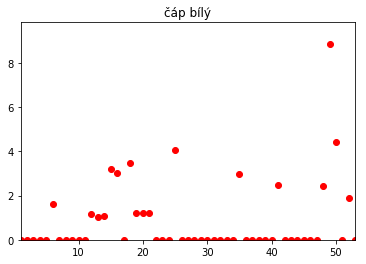

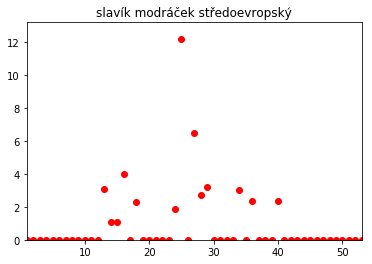

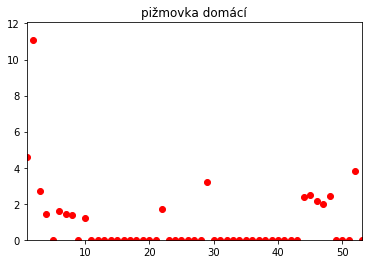

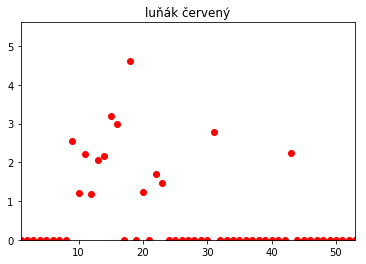

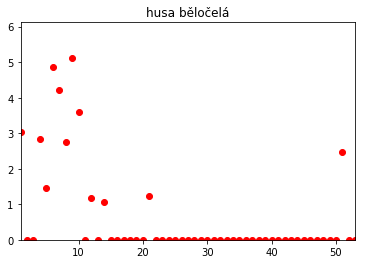

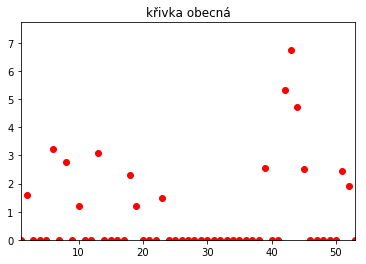

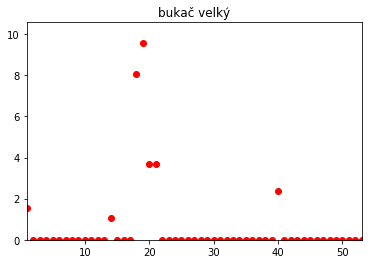

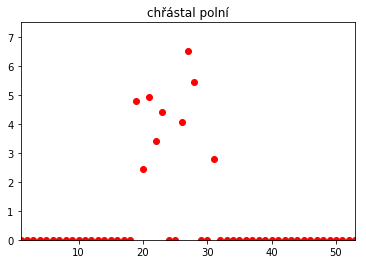

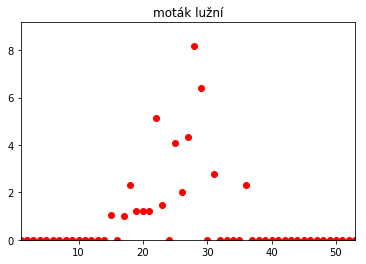

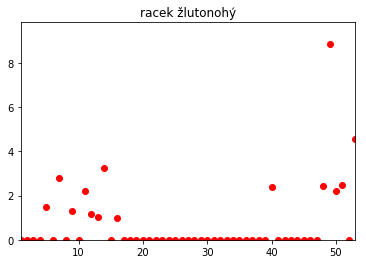

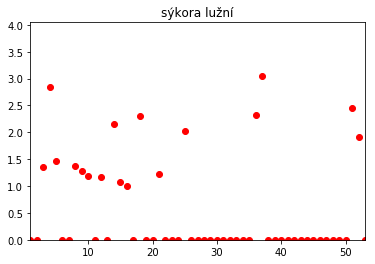

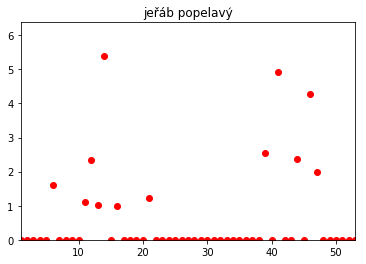

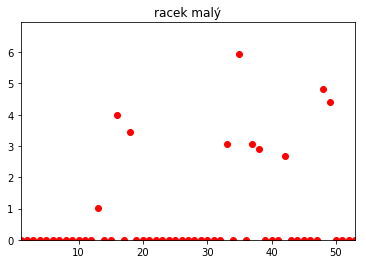

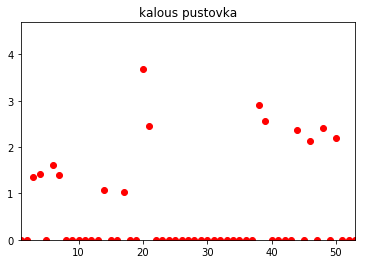

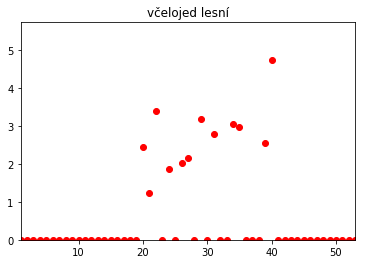

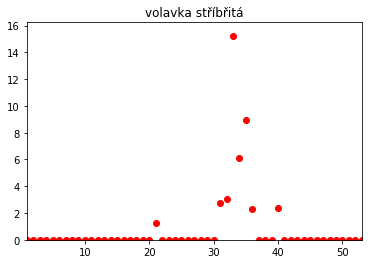

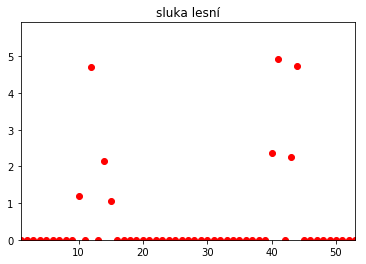

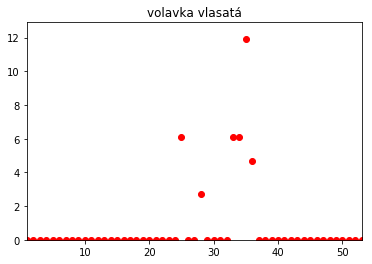

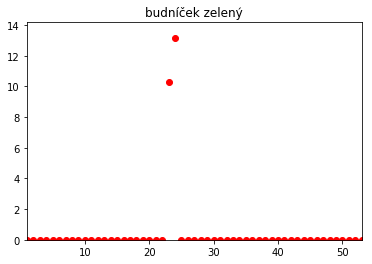

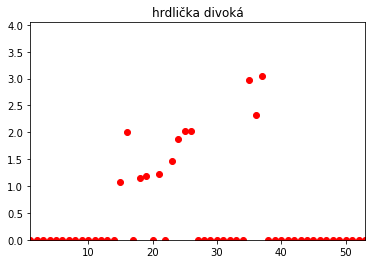

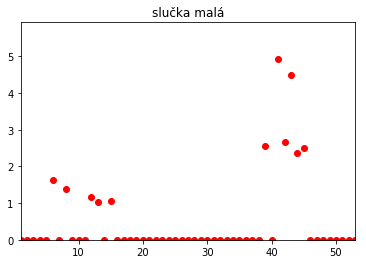

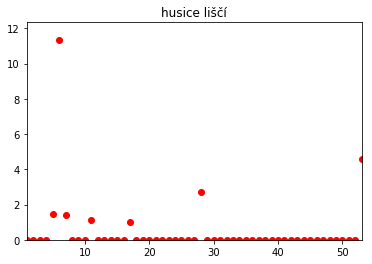

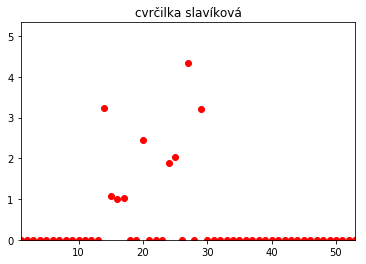

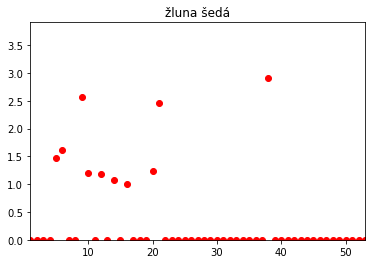

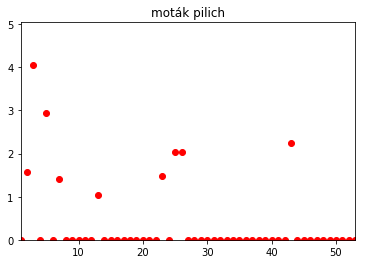

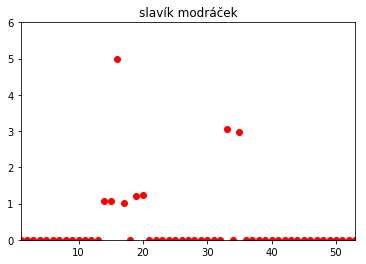

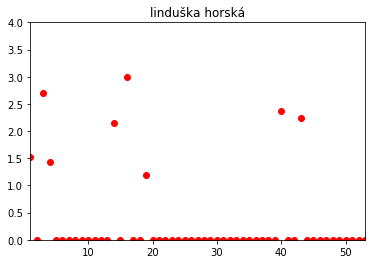

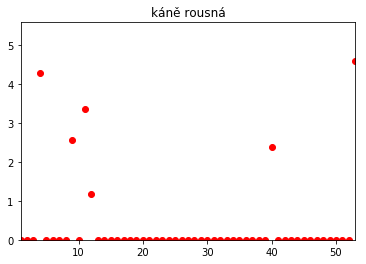

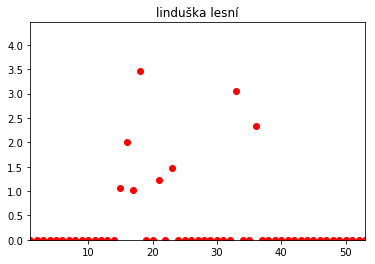

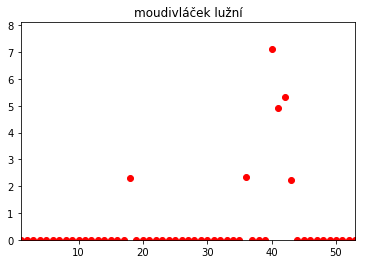

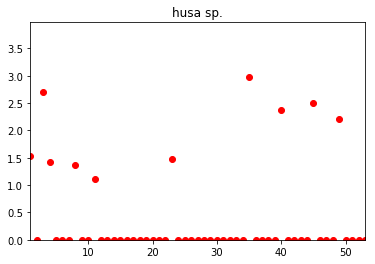

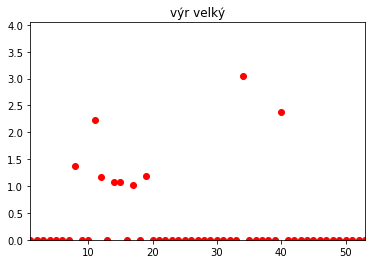

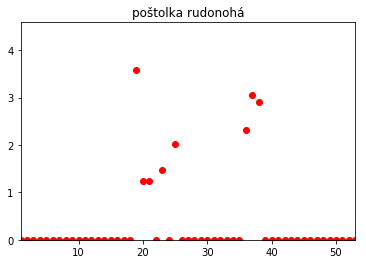

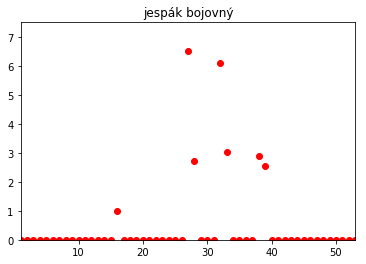

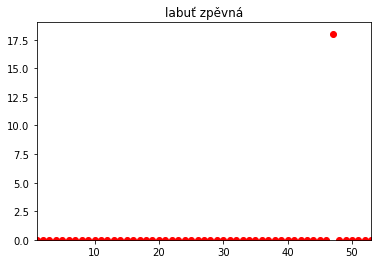

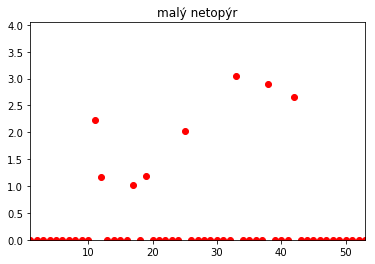

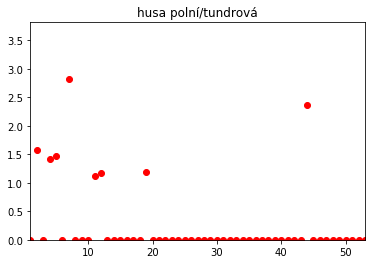

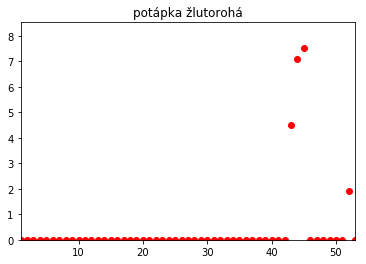

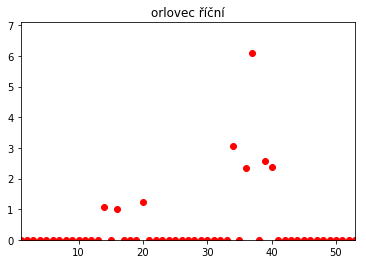

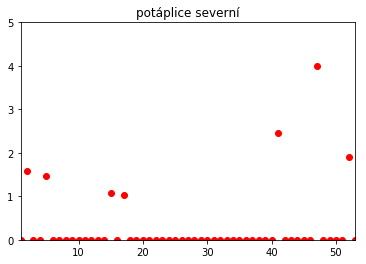

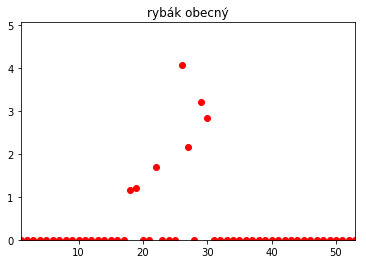

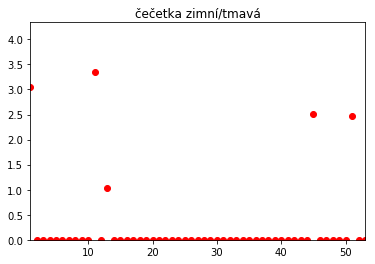

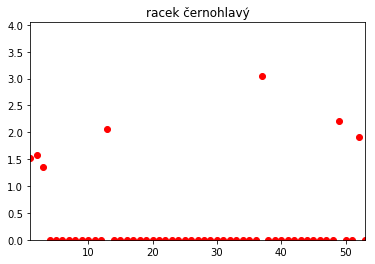

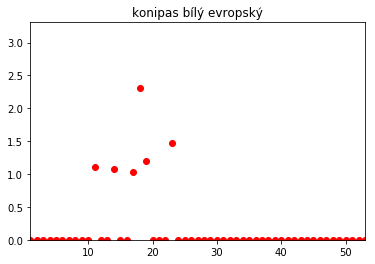

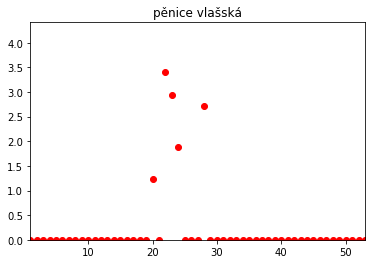

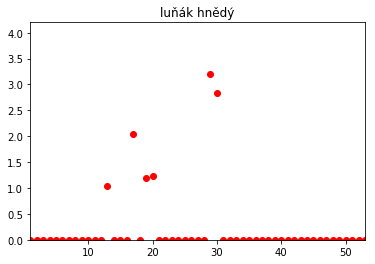

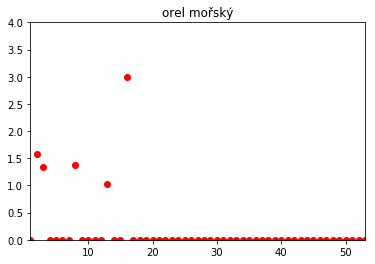

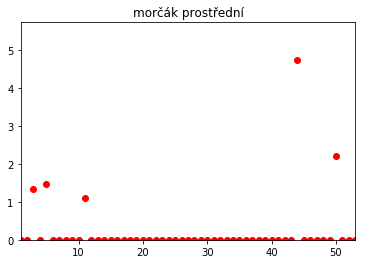

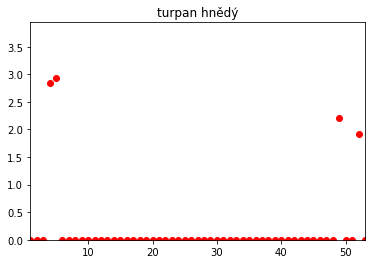

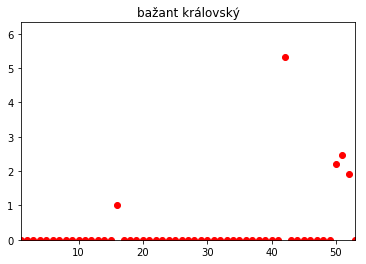

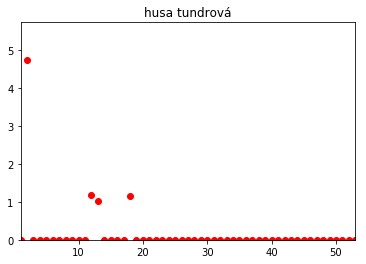

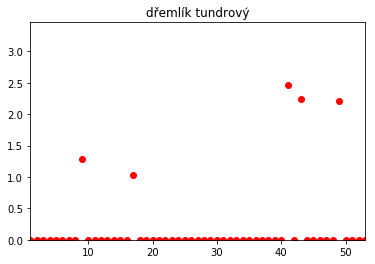

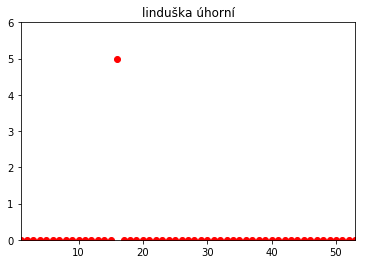

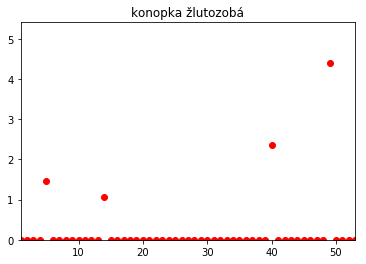

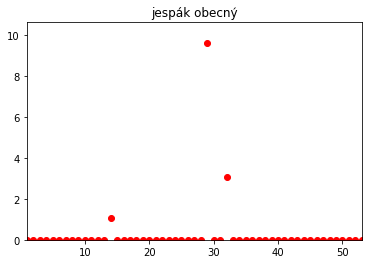

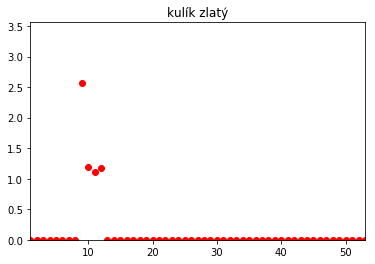

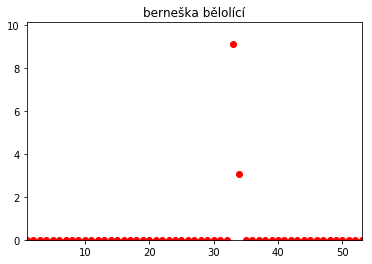

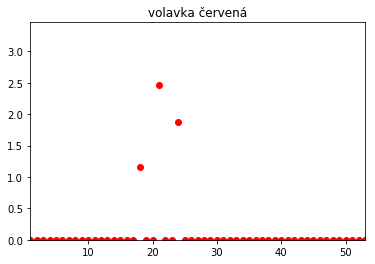

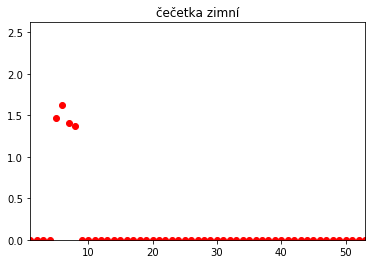

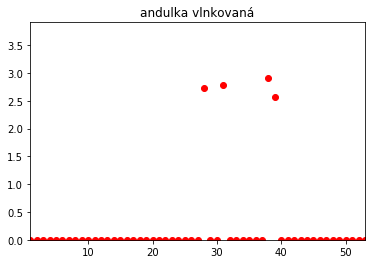

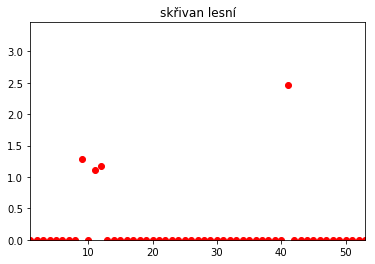

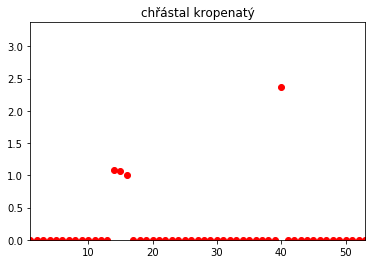

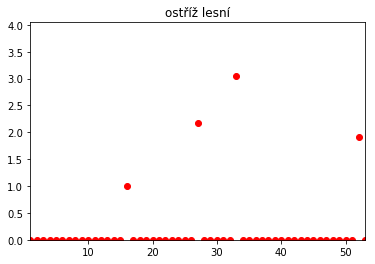

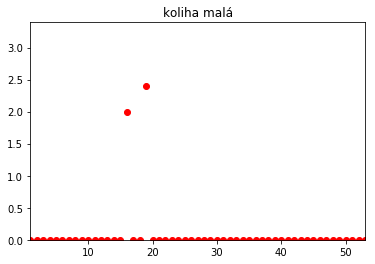

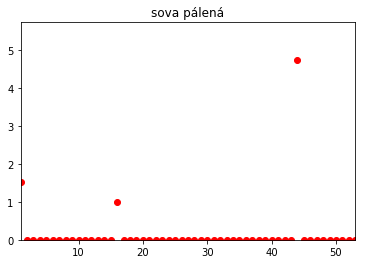

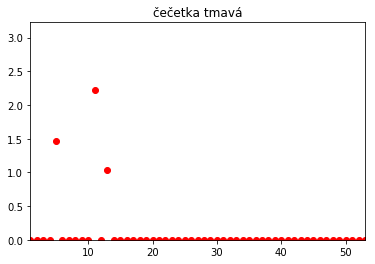

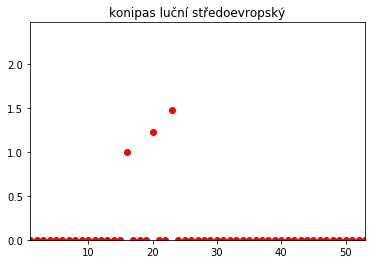

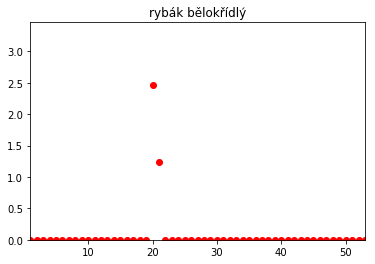

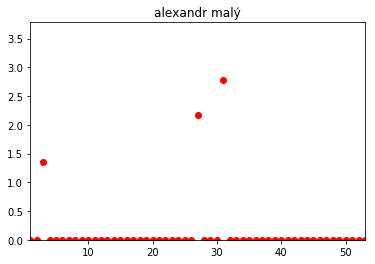

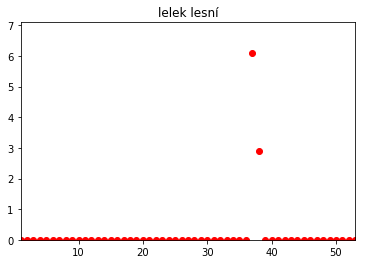

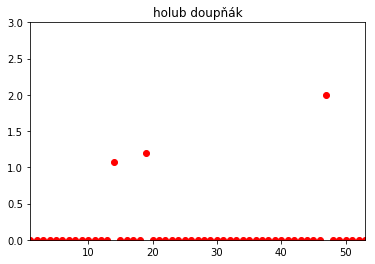

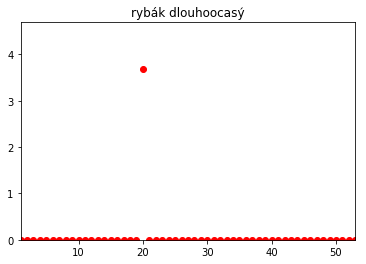

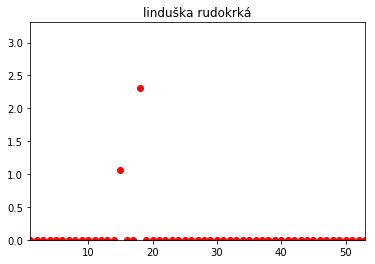

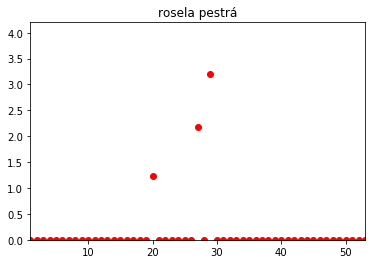

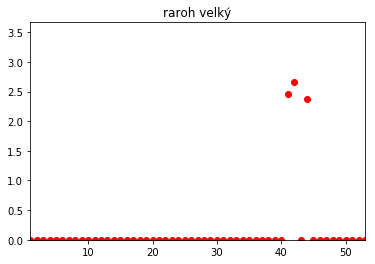

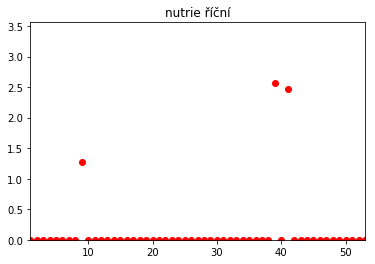

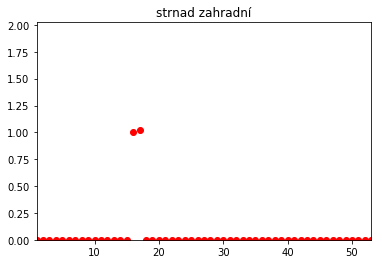

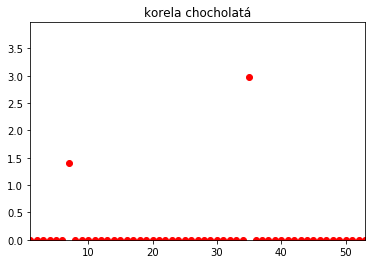

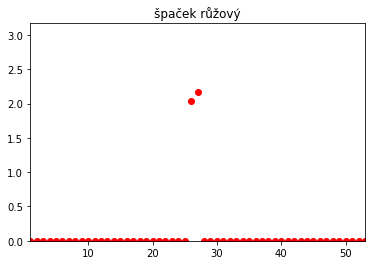

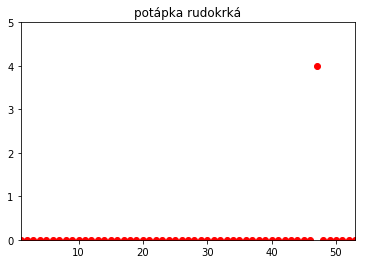

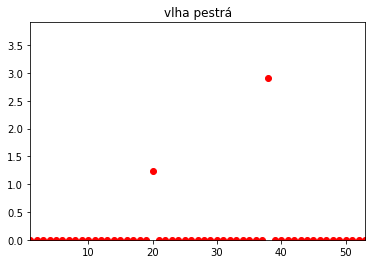

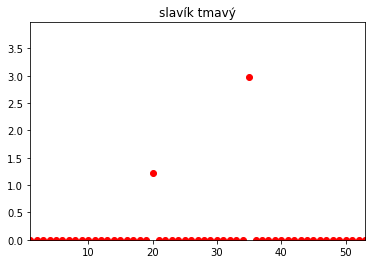

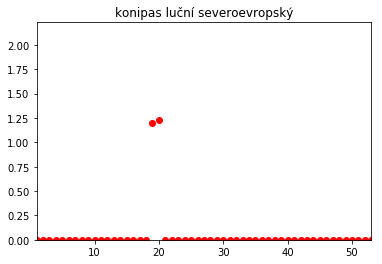

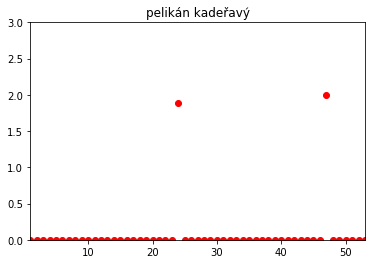

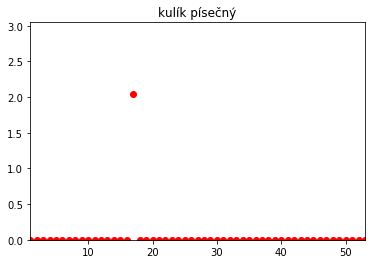

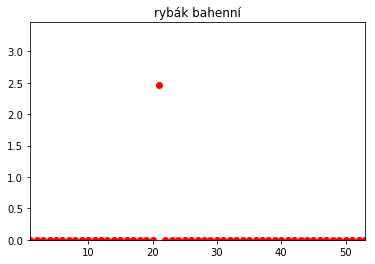

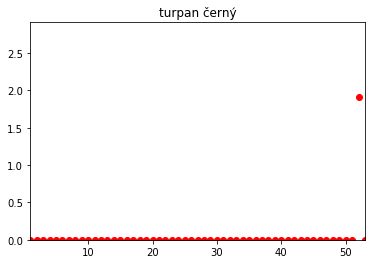

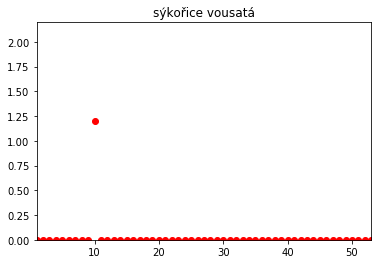

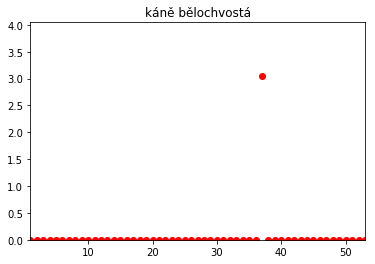

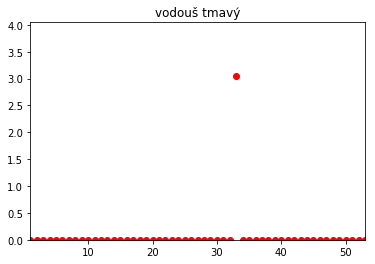

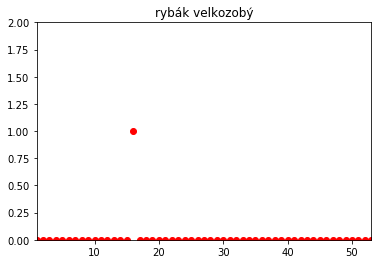

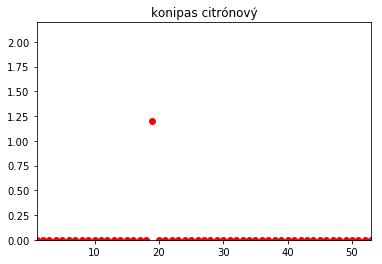

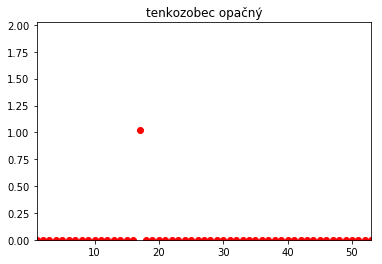

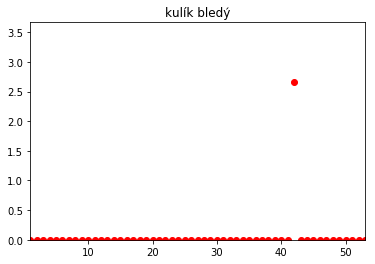

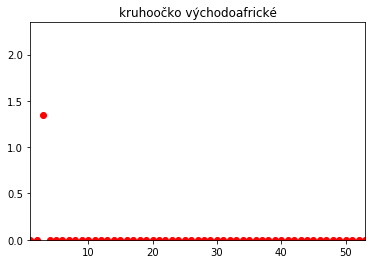

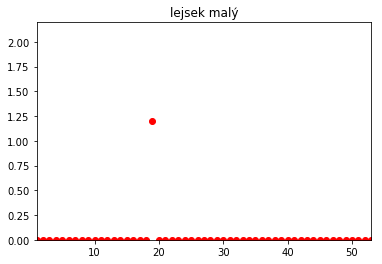

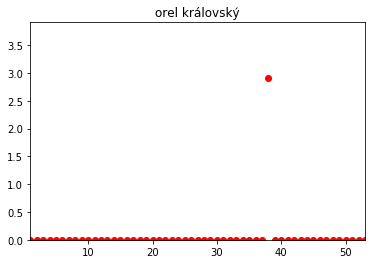

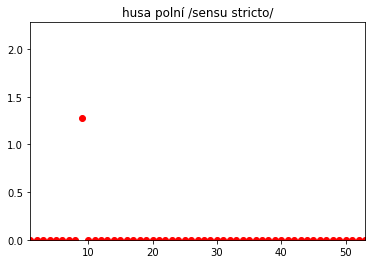

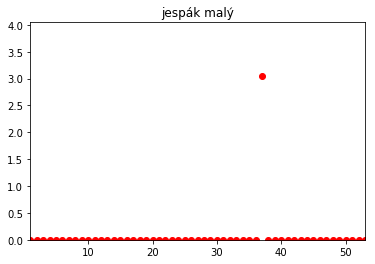

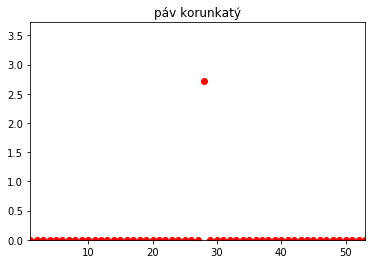

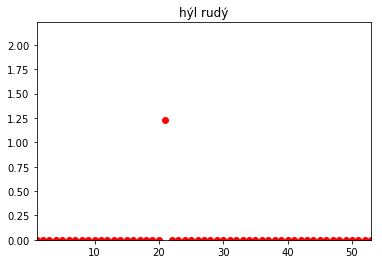

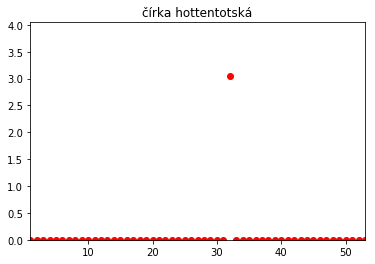

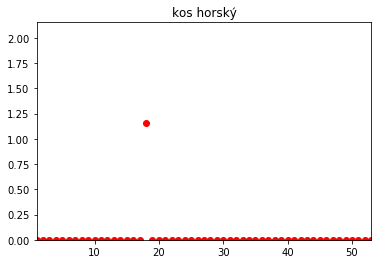

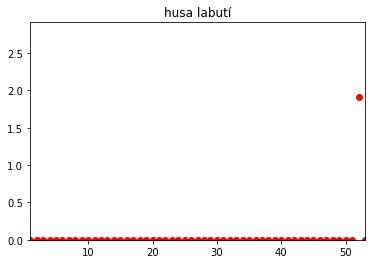

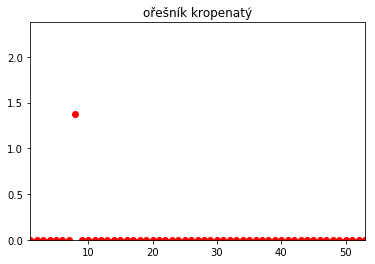

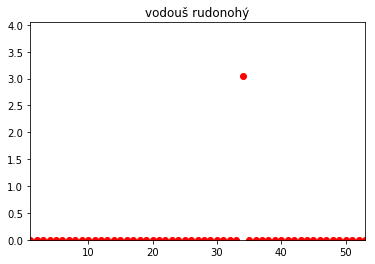

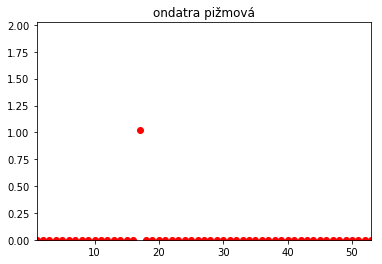

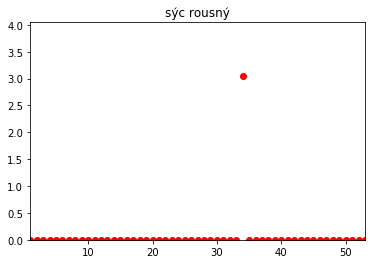

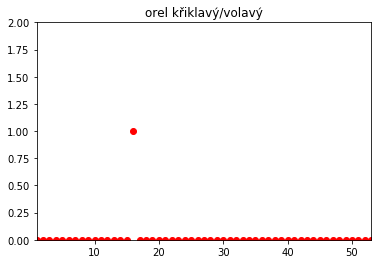

In [9]:
#draw charts
ordr = 0
for sp in sorted(sums, key=sums.get, reverse=True):
    ordr += 1
    ser = series[sp]
    plt.figure(ordr)
    plt.plot(list(ser.keys()), np.divide(list(ser.values()), list(weekly_act.values())), 'ro')
    plt.axis([1, 53, 0, np.max(np.divide(list(ser.values()), list(weekly_act.values()))) + 1])
    plt.title(sp)

    plt.show()